# Conversational System - POC

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import xml.etree.ElementTree as ET
%matplotlib inline

### Common base class for all the nodes

In [19]:
class Node:
    'Common base class for all Nodes'
    nodeCount = 0
    def __init__(self, nodeId, groupId, content):
        ## content of the node
        self.content = content
        
        ## node Id
        self.nodeId = nodeId
        
        ## group Id of the node.
        self.groupId = groupId
        
        ## Table is a list of Transitions(conditions associated with actions)
        self.table = []  
        
        ## node counter
        Node.nodeCount += 1
   
    def displayCount(self):
        print "Total no of nodes %d" % Node.nodeCount

    def displayNode(self):
        print "Content : ", self.content,  ", Id: ", self.nodeId
        
    def addTransition(self,*transition):
        for i in range(0,len(transition)):
            self.table.append(transition[i])

### Common base class for the transitions

In [20]:
#Each Transition table has multiple transitions. Each Transition has a condition and an action which is to be performed when
# the condition is met.

class Transition:
    'Common base class for all Transitions in a transition table'
    def __init__(self, nodeid, condition, action):
        self.nodeid = nodeid
        self.condition = condition
        self.action = action

## Reading Xml content

In [31]:
with open('node1.xml') as f: xmlcontent = f.read()
f.close()

print xmlcontent

soup = bs(xmlcontent, 'xml')

nodeid = soup.ID
groupid = soup.groupID
content = soup.content

print(nodeid.string)

#populating actions and conditions
conditions = []
actions = []
for link in soup.find_all('condition'):
    conditions.append(link.string)
    print link.string
    
for link in soup.find_all('action'):
    actions.append(link.string)
    print link.string

#creating a node instance    
node1 = Node(nodeid,groupid,content)

#adding the conditions and actions to the node
print "len of conditions is "+str(len(conditions))
if len(conditions)!=0 and len(conditions)==len(actions):    
    for i in (0,len(conditions)-1):
        t1 = Transition(nodeid,conditions[i],actions[i])
        node1.addTransition(t1)
        

<node>
	<ID> 1 </ID>
	<groupID> 1 </groupID>
	<content>Hi, what’s your name?</content>
	<table>
		<entry>
			<conditions>
				<condition>String</condition>
				<condition>is-Male</condition>
			</conditions>
			<actions>
				<action>SQL(INSERT INTO USERS(uname))</action>
				<action>GOTO GROUP 2</action>
			</actions>
		</entry>
	</table>
</node>

 1 
String
is-Male
SQL(INSERT INTO USERS(uname))
GOTO GROUP 2
len of conditions is 2


## adding additional nodes

In [49]:
for t in node1.table:
    print t.condition

node2 = Node(2,1,"Hi, I am your personal Python tutor. What is you name?")
t1 = Transition(1,isString("abc"),"goto 2")
t2 = Transition(1,isinstance(1, int),"goto 3")
t3 = Transition(1,isinstance(2.3, float),"goto 3")
t4 = Transition(1,isinstance("abc", basestring),"goto 3")

node2.addTransition(t1,t2,t3,t4)
print len(node2.table)

node3 = Node(3,1,"We have different programs . To find the right one for you, you have to answer a couple for questions.Do you know pandas?")

String
is-Male
4


In [53]:
def isString(blah):
    if str(blah)==blah:
        return True
    return False

isString(2)

Transition(1,isString,"Sriram")
print isinstance("abc", basestring)

True


## Creating a graph from the data

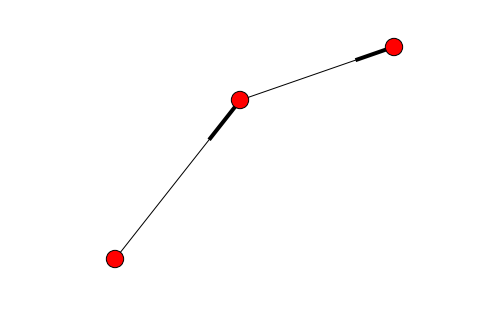

In [37]:
G=nx.DiGraph()

#edges should be added based on the transition conditions dynamically
G.add_edge(node1,node2)
G.add_edge(node2,node3)
nx.draw(G,pos=nx.spring_layout(G))